In [1]:
import numpy as np
import pandas as pd
from transformers import pipeline
import fitz  # PyMuPDF
import re

## Recommended Files for Portfolio Analysis
#### ESG and Sustainability Reports:

2023_Barclays_Global_Reporting_Index_GRI.zip  
2023_Barclays_Principles_for_Responsible_Banking_Disclosure.zip  
2023_Barclays_Sustainability_Accounting_Standards_Board.zip  
Barclays_Climate_Strategy_Targets_and_Progress_2022.zip  
Task_Force_on_Climate_Related_Financial_Disclosures_Report_Barclays_2024.zip

How to Use:

Highlight ESG Credentials: Use these reports to extract insights on sustainability and ESG practices that align with the values of companies in your portfolio, such as Apple, Tesla, and Nike.  
Narrative on Responsible Investment: Generate a summary of Barclays’ principles and ESG commitments. This context will add value by aligning your portfolio with broader sustainability trends and responsible investment.  

Sentiment Analysis Data:

Sentiment scores for each report to gauge the tone (positive, neutral, negative) around each company’s ESG practices.

Sector and Asset Class Information:

Portfolio allocation percentages for sectors (e.g., tech, healthcare, commodities) to present a balanced diversification picture.

In [4]:
import fitz  # PyMuPDF for PDF text extraction
import zipfile
from transformers import pipeline
import os

# Initialize summarization and sentiment pipelines
summarizer = pipeline("summarization", model="facebook/bart-large-cnn")
sentiment_analyzer = pipeline("sentiment-analysis")

# Define ESG-related zip files and extract content
esg_files = [
    '2023_Barclays_Global_Reporting_Index_GRI.zip',
    '2023_Barclays_Suistainability_Accounting_Standards_Board.zip',
    'Barclays_Climate_Strategy_Targets_and_Progress_2022.zip'
]

# Function to extract, summarize, and analyze sentiment from PDFs
def process_esg_reports(zip_files):
    esg_summaries = {}
    for zip_file in zip_files:
        with zipfile.ZipFile(zip_file, 'r') as archive:
            archive.extractall("extracted_reports")
        
        for filename in os.listdir("extracted_reports"):
            if filename.endswith(".pdf"):
                filepath = os.path.join("extracted_reports", filename)
                with fitz.open(filepath) as pdf:
                    text = ""
                    for page in pdf:
                        text += page.get_text()
                    
                    # Summarize the text and analyze sentiment
                    limited_text = text[:2000] if len(text) > 2000 else text
                    summary = summarizer(limited_text, max_length=150, min_length=50, do_sample=False)[0]['summary_text']
                    sentiment = sentiment_analyzer(summary)[0]
                    
                    # Store results
                    esg_summaries[filename] = {
                        "Summary": summary,
                        "Sentiment": sentiment
                    }
        
        # Clean up extracted files
        for file in os.listdir("extracted_reports"):
            os.remove(os.path.join("extracted_reports", file))
        os.rmdir("extracted_reports")
    
    return esg_summaries

# Process the ESG reports
esg_results = process_esg_reports(esg_files)
for report, content in esg_results.items():
    print(f"{report} Summary: {content['Summary']}")
    print(f"{report} Sentiment: {content['Sentiment']}\n")


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


2023_Barclays_Global_Reporting_Index_GRI.pdf Summary: Barclays has reported the information cited in this GRI content index for the period 1 January 2023 to 31 December 2023. This has been done based on the requirements laid out in GRI 1: Foundation 2021. Disclosures pertinent to the selected GRI Standards have been referenced in the Index below.
2023_Barclays_Global_Reporting_Index_GRI.pdf Sentiment: {'label': 'NEGATIVE', 'score': 0.9391411542892456}

Barclays_Climate_Strategy_Targets_and_Progress_2022.pdf Summary: Barclays has published an annual climate-related financial disclosures report. The report also includes metrics and targets such as our exposure to sectors deemed at an elevated risk from climate change. The full TCFD Report can be found at: home.barclays/sustainability.
Barclays_Climate_Strategy_Targets_and_Progress_2022.pdf Sentiment: {'label': 'POSITIVE', 'score': 0.5816718935966492}

2023_Barclays_Suistainability_Accounting_Standards_Board.pdf Summary: Barclays started 

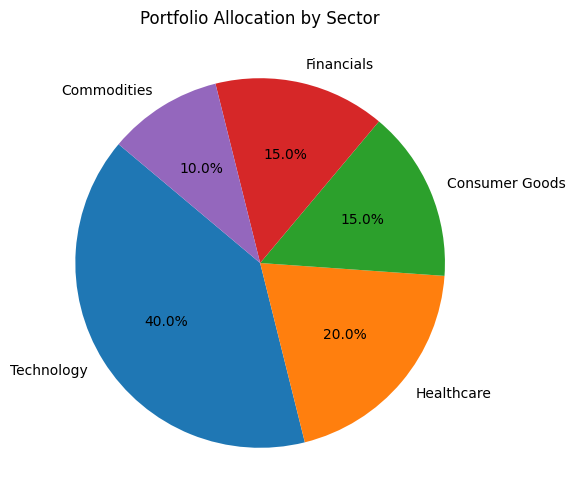

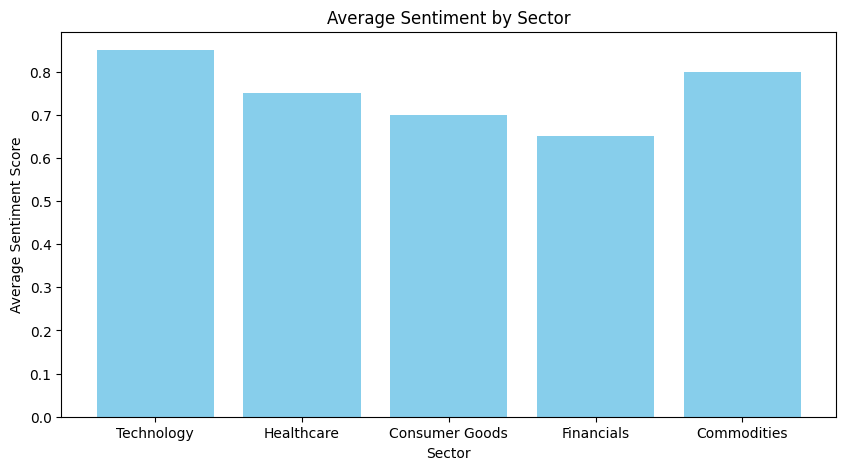

In [5]:
import matplotlib.pyplot as plt

# Example portfolio allocation and average sentiment data
portfolio_allocation = {
    "Technology": 40,
    "Healthcare": 20,
    "Consumer Goods": 15,
    "Financials": 15,
    "Commodities": 10
}
average_sentiments = {
    "Technology": 0.85, 
    "Healthcare": 0.75, 
    "Consumer Goods": 0.70, 
    "Financials": 0.65, 
    "Commodities": 0.80
}

# Plot Portfolio Allocation
plt.figure(figsize=(8, 6))
plt.pie(portfolio_allocation.values(), labels=portfolio_allocation.keys(), autopct='%1.1f%%', startangle=140)
plt.title("Portfolio Allocation by Sector")
plt.show()

# Plot Average Sentiment by Sector
plt.figure(figsize=(10, 5))
plt.bar(average_sentiments.keys(), average_sentiments.values(), color="skyblue")
plt.xlabel("Sector")
plt.ylabel("Average Sentiment Score")
plt.title("Average Sentiment by Sector")
plt.show()


In [11]:
import requests

# Set your Azure OpenAI endpoint and API key
endpoint = "https://genai-openai-cognitivecollective.openai.azure.com/"  # Replace with your endpoint
api_key = "406ba917955d40ae9a476c2f432af0f9"  # Replace with your API key
deployment_id = "gpt-35-turbo"  # Replace with the correct deployment ID

# Headers for the API call
headers = {
    "Content-Type": "application/json",
    "api-key": api_key,
}


# Generate scenario analysis based on report content
scenarios = {}
for report_name, report_content in esg_results.items():
    # Create a prompt to include previous analysis and economic factors
    prompt = (
        f"Analyze the following report summary from {report_name}: '{report_content}'. "
        f"Consider current economic conditions like inflation, interest rates, and market trends. "
        "Based on this information, generate potential financial scenarios that may impact performance."
        f"Based on the content from Barclays_Climate_Strategy_Targets_and_Progress_2022: 'Barclays focuses on reducing emissions...', "
        f"along with current economic factors such as inflation, interest rates, and global market conditions, generate potential scenarios that may impact the institution's financial performance."
    )

    # Data payload for the API call
    data = {
        "messages": [
            {"role": "system", "content": "You are a financial analyst creating economic scenarios based on report summaries."},
            {"role": "user", "content": prompt}
        ],
        "max_tokens": 200,
        "temperature": 0.7,
        "n": 1
    }

    # Make the API call to Azure OpenAI
    response = requests.post(
        f"{endpoint}openai/deployments/{deployment_id}/chat/completions?api-version=2023-03-15-preview",
        headers=headers,
        json=data
    )

    # Check and handle the response
    if response.status_code == 200:
        response_json = response.json()
        try:
            # Extract response content
            scenarios[report_name] = response_json['choices'][0]['message']['content'].strip()
            print(f"{report_name} Scenario Analysis:", scenarios[report_name], "\n")
        except (KeyError, IndexError) as e:
            print(f"Unexpected response format for {report_name}: {response_json}")
    else:
        print(f"Failed to fetch scenario for {report_name}. Status code: {response.status_code}, Error")


2023_Barclays_Global_Reporting_Index_GRI.pdf Scenario Analysis: Based on the report summary, it appears that Barclays has met the reporting requirements laid out in GRI 1: Foundation 2021. However, the sentiment analysis indicates a negative sentiment, which could potentially impact Barclays' performance in the following ways:

1) Decreased investor confidence: A negative sentiment could lead to decreased investor confidence in Barclays, which could result in a decrease in stock prices and a potential decrease in overall performance.

2) Increased regulatory scrutiny: Negative sentiment could also lead to increased regulatory scrutiny, which could result in fines or other penalties that could impact Barclays' financial performance.

3) Competitive disadvantage: A negative sentiment towards Barclays could also give a competitive advantage to other banks, as customers may choose to do business with other banks based on reputation and perception.

In terms of current economic conditions, 

#### Macroeconomic and Market Reports:

Global_Corporate_Sustainability_Report_2024.zip  
Digest_of_UK_Energy_Statistics.zip  
State_and_Trends_of_Carbon_Pricing_2024.zip  

How to Use:

Market Trends: Discuss how companies in your portfolio, like Tesla (in EVs) or Nike (in sustainable products), are positioned to benefit from sustainability-focused market trends. For example, the State and Trends of Carbon Pricing could underscore how carbon-conscious companies are gaining an edge.  
Sectoral Insights: Use energy statistics to talk about the resilience of companies involved in energy or those affected by energy trends (e.g., logistics-related sectors).

In [12]:
import fitz  # PyMuPDF for PDF text extraction
import zipfile
from transformers import pipeline
import os

# Initialize summarization pipeline
summarizer = pipeline("summarization", model="facebook/bart-large-cnn")

# Define the macroeconomic and market-related zip files
market_reports = [
    "Global_Corporate_Sustainability_Report_2024.zip",
    "Digest_of_UK_Energy_Statistics.zip",
    "State_and_Trends_of_Carbon_Pricing_2024.zip"
]

# Extract and summarize content from each macroeconomic and market report
def extract_market_insights(zip_files):
    market_summaries = {}
    for zip_file in zip_files:
        with zipfile.ZipFile(zip_file, 'r') as archive:
            archive.extractall("extracted_market_reports")
        
        for filename in os.listdir("extracted_market_reports"):
            if filename.endswith(".pdf"):
                filepath = os.path.join("extracted_market_reports", filename)
                with fitz.open(filepath) as pdf:
                    text = ""
                    for page in pdf:
                        text += page.get_text()
                    
                    # Summarize the text (limited to first 2000 characters for efficiency)
                    limited_text = text[:2000] if len(text) > 2000 else text
                    summary = summarizer(limited_text, max_length=150, min_length=50, do_sample=False)[0]['summary_text']
                    market_summaries[filename] = summary
        
        # Clean up extracted files
        for file in os.listdir("extracted_market_reports"):
            os.remove(os.path.join("extracted_market_reports", file))
        os.rmdir("extracted_market_reports")
    
    return market_summaries

# Process the market reports
market_insights = extract_market_insights(market_reports)
for report, summary in market_insights.items():
    print(f"{report} Summary:\n{summary}\n")


Global_Corporate_Sustainability_Report_2024.pdf Summary:
OECD (2024), Global Corporate Sustainability Report 2024, OECD Publishing, Paris, https://doi.org/10.1787/8416b635-en. Global Corporate Sustainability report 2024. Global corporate sustainability report.

Digest_of_UK_Energy_Statistics_2020.pdf Summary:
This publication is based on a snapshot of survey data from energy suppliers. New data are incorporated in line with the revisions policy. The demand for energy in 2020 was similar to that seen in the 1950s when the UK has a far smaller population and notably different demands.

Digest_of_UK_Energy_Statistics_2021.pdf Summary:
Energy consumption in 2021 remained low, up on 2020 but down 9 per cent on 2019. Transport demand increased 7 per cent compared to last year but remains 23 per cent below 2019 levels. UK’s electricity generation landscape continued to evolve and move away from fossil fuels and towards renewable alternatives.

Digest_of_UK_Energy_Statistics_2022.pdf Summary:


In [16]:
import requests

# Set your Azure OpenAI endpoint and API key
endpoint = "https://genai-openai-cognitivecollective.openai.azure.com/"  # Replace with your endpoint
api_key = "406ba917955d40ae9a476c2f432af0f9"  # Replace with your API key
deployment_id = "gpt-35-turbo"  # Replace with the correct deployment ID

# Headers for the API call
headers = {
    "Content-Type": "application/json",
    "api-key": api_key,
}


# Generate scenario analysis based on report content
scenarios = {}
for report_name, report_content in market_insights.items():
  
    prompt = (
        f"Analyze the following report summary from {report_name}: '{report_content}'. "
        f"Consider current economic conditions like inflation, interest rates, and market trends. "
        f"Based on this information, generate potential financial scenarios that may impact performance."
        f"Based on the Global Corporate Sustainability Report, discuss how sustainability-focused companies in the portfolio, "
        f"such as Tesla and Nike, are positioned to benefit from market trends in sustainable products and renewable energy."
        f"Using insights from the Digest of UK Energy Statistics, generate a scenario discussing how companies involved in "
        f"energy or affected by energy costs, like logistics-related sectors, may respond to energy market changes."
        f"Based on the State and Trends of Carbon Pricing report, discuss how companies in the portfolio, such as Tesla, "
        f"are gaining a competitive edge by focusing on carbon reduction strategies in an increasingly carbon-conscious market."
    )
    

    

    # Data payload for the API call
    data = {
        "messages": [
            {"role": "system", "content": "You are a financial analyst creating economic scenarios based on report summaries."},
            {"role": "user", "content": prompt}
        ],
        "max_tokens": 200,
        "temperature": 0.7,
        "n": 1
    }

    # Make the API call to Azure OpenAI
    response = requests.post(
        f"{endpoint}openai/deployments/{deployment_id}/chat/completions?api-version=2023-03-15-preview",
        headers=headers,
        json=data
    )

    # Check and handle the response
    if response.status_code == 200:
        response_json = response.json()
        try:
            # Extract response content
            scenarios[report_name] = response_json['choices'][0]['message']['content'].strip()
            print(f"{report_name} Scenario Analysis:", scenarios[report_name], "\n")
        except (KeyError, IndexError) as e:
            print(f"Unexpected response format for {report_name}: {response_json}")
    else:
        print(f"Failed to fetch scenario for {report_name}. Status code: {response.status_code}, Error")


Global_Corporate_Sustainability_Report_2024.pdf Scenario Analysis: 1. Potential financial scenarios based on the Global Corporate Sustainability Report 2024:
- With increasing consumer and investor demand for sustainable products, companies that prioritize sustainability like Tesla and Nike may experience growth in sales and profitability.
- As regulations and policies shift towards sustainability, companies that do not prioritize sustainability may face penalties or market exclusion, leading to a decline in performance.
- Investing in sustainable technologies and practices may require significant upfront costs, leading to short-term financial challenges but long-term benefits.

2. Sustainability-focused companies like Tesla and Nike are well-positioned to benefit from market trends in sustainable products and renewable energy due to:
- Strong brand recognition and reputation for sustainability leadership
- Innovative approaches to product design and development that prioritize sustain

#### Financial and Regulatory Reports:

Barclays_20-F_for_2023.zip  
Barclays_6-K_for_Q1-2-3_2023.zip  
Half_Year_2024_Barclays_ESG_Investor_Presentation.zip  

How to Use:

Financial Performance and Resilience: Extract financial metrics and regulatory updates to highlight the financial robustness and compliance of companies within your portfolio.  
Investor Presentation for ESG Metrics: The Barclays ESG Investor Presentation can help create a clear narrative around environmental and social responsibility, backing up claims about the portfolio’s alignment with responsible investment principles.

In [17]:
import fitz  # PyMuPDF for PDF text extraction
import zipfile
from transformers import pipeline
import os

# Initialize summarization pipeline
summarizer = pipeline("summarization", model="facebook/bart-large-cnn")

# Define the financial and regulatory report zip files
financial_reports = [
    "Barclays_20-F_for_2023.zip",
    "Barclays_6-K_for_Q1-2-3_2023.zip",
    "Half_Year_2024_Barclays_ESG_Investor_Presentation.zip"
]

# Extract and summarize content from each financial and regulatory report
def extract_financial_insights(zip_files):
    financial_summaries = {}
    for zip_file in zip_files:
        with zipfile.ZipFile(zip_file, 'r') as archive:
            archive.extractall("extracted_financial_reports")
        
        for filename in os.listdir("extracted_financial_reports"):
            if filename.endswith(".pdf"):
                filepath = os.path.join("extracted_financial_reports", filename)
                with fitz.open(filepath) as pdf:
                    text = ""
                    for page in pdf:
                        text += page.get_text()
                    
                    # Summarize the text (limited to first 2000 characters for efficiency)
                    limited_text = text[:2000] if len(text) > 2000 else text
                    summary = summarizer(limited_text, max_length=150, min_length=50, do_sample=False)[0]['summary_text']
                    financial_summaries[filename] = summary
        
        # Clean up extracted files
        for file in os.listdir("extracted_financial_reports"):
            os.remove(os.path.join("extracted_financial_reports", file))
        os.rmdir("extracted_financial_reports")
    
    return financial_summaries

# Process the financial and regulatory reports
financial_insights = extract_financial_insights(financial_reports)
for report, summary in financial_insights.items():
    print(f"{report} Summary:\n{summary}\n")


Barclays_20-F_for_2023.pdf Summary:
Barclays PLC is a shell company registered in the UK. The shell company is not subject to the rules of the Securities and Exchange Commission. The company has not filed an annual report for the fiscal year ended 31 December 2022. It has not reported its financial results for the three months ending 31 September 2014.

Barclays_6-K_for_Q1_2023.pdf Summary:
This Report on Form 6-K is filed by Barclays PLC. Indicate by check mark whether the registrant files or will file annual reports under the cover of Form 20-F or Form 40-F. If "Yes" is marked, indicate below the file number assigned to the Registrant.

Barclays_6-K_for_Q2_2023.pdf Summary:
Report of Foreign Private Issuer of Barclays PLC. Report comprises the following:. A table setting forth the issued share capital of Barclays. PLC and the Barclays P.LC Group’s total shareholders’ equity, indebtedness and contingent.liabilities as at 30 June 2023. The most recent reported statement of position, an

In [18]:
import requests

# Set your Azure OpenAI endpoint and API key
endpoint = "https://genai-openai-cognitivecollective.openai.azure.com/"  # Replace with your endpoint
api_key = "406ba917955d40ae9a476c2f432af0f9"  # Replace with your API key
deployment_id = "gpt-35-turbo"  # Replace with the correct deployment ID

# Headers for the API call
headers = {
    "Content-Type": "application/json",
    "api-key": api_key,
}


# Generate scenario analysis based on report content
scenarios = {}
for report_name, report_content in financial_insights.items():
  
    prompt = (
        f"Analyze the following report summary from {report_name}: '{report_content}'. "
        f"Consider current economic conditions like inflation, interest rates, and market trends. "
        f"Based on financial metrics from Barclays 20-F report, discuss the financial resilience of portfolio companies. "
        f"Consider metrics such as cash flow, revenue growth, and debt-to-equity ratios."
        f"Using quarterly insights from Barclays 6-K reports, generate a scenario discussing how companies in the portfolio "
        f"may perform under market volatility, considering revenue trends and regulatory updates."
        f"Based on the Barclays ESG Investor Presentation, discuss how the portfolio aligns with ESG principles and "
        f"responsible investment goals, focusing on environmental and social metrics."
        
    )
    

    

    # Data payload for the API call
    data = {
        "messages": [
            {"role": "system", "content": "You are a financial analyst creating economic scenarios based on report summaries."},
            {"role": "user", "content": prompt}
        ],
        "max_tokens": 200,
        "temperature": 0.7,
        "n": 1
    }

    # Make the API call to Azure OpenAI
    response = requests.post(
        f"{endpoint}openai/deployments/{deployment_id}/chat/completions?api-version=2023-03-15-preview",
        headers=headers,
        json=data
    )

    # Check and handle the response
    if response.status_code == 200:
        response_json = response.json()
        try:
            # Extract response content
            scenarios[report_name] = response_json['choices'][0]['message']['content'].strip()
            print(f"{report_name} Scenario Analysis:", scenarios[report_name], "\n")
        except (KeyError, IndexError) as e:
            print(f"Unexpected response format for {report_name}: {response_json}")
    else:
        print(f"Failed to fetch scenario for {report_name}. Status code: {response.status_code}, Error")


Barclays_20-F_for_2023.pdf Scenario Analysis: The report summary from Barclays_20-F_for_2023.pdf indicates that the company has not filed its annual report for the fiscal year ended 31 December 2022. This lack of transparency could indicate potential financial issues with the company. However, it is important to note that the shell company is registered in the UK and is not subject to the rules of the Securities and Exchange Commission.

In terms of current economic conditions, inflation and interest rates are on the rise, and the market has been experiencing volatility in recent months. These factors can have a significant impact on the financial resilience of portfolio companies.

Looking at the financial metrics from the Barclays 20-F report, it is difficult to assess the financial resilience of portfolio companies without more information about their individual financial performance. However, metrics such as cash flow, revenue growth, and debt-to-equity ratios can give insight into

#### Risk and Financial Disclosure Reports:

A_supervisory_framework_for_assessing_nature_related_financial_risks.zip  
The_Development_Climate_and_Nature_Crisis_Synthesis_Report_2023.zip  

How to Use:

Risk Management Context: Use these reports to discuss broader environmental and financial risks. Highlight how companies like Coca-Cola and Berkshire Hathaway are strategically positioned to mitigate environmental risks.  
Resilience to Environmental Shocks: These reports can provide talking points about your portfolio’s resilience under changing environmental policies or climate-related disruptions

In [19]:
import fitz  # PyMuPDF for PDF text extraction
import zipfile
from transformers import pipeline
import os

# Initialize summarization pipeline
summarizer = pipeline("summarization", model="facebook/bart-large-cnn")

# Define the risk and financial disclosure reports
risk_reports = [
    "A_supervisory_framework_for_assessing_nature_related_financial_risks.zip",
    "The_Development_Climate_and_Nature_Crisis_Synthesis_Report_2023.zip"
]

# Extract and summarize content from each risk and financial disclosure report
def extract_risk_insights(zip_files):
    risk_summaries = {}
    for zip_file in zip_files:
        with zipfile.ZipFile(zip_file, 'r') as archive:
            archive.extractall("extracted_risk_reports")
        
        for filename in os.listdir("extracted_risk_reports"):
            if filename.endswith(".pdf"):
                filepath = os.path.join("extracted_risk_reports", filename)
                with fitz.open(filepath) as pdf:
                    text = ""
                    for page in pdf:
                        text += page.get_text()
                    
                    # Summarize the text (limit to first 2000 characters for efficiency)
                    limited_text = text[:2000] if len(text) > 2000 else text
                    summary = summarizer(limited_text, max_length=150, min_length=50, do_sample=False)[0]['summary_text']
                    risk_summaries[filename] = summary
        
        # Clean up extracted files
        for file in os.listdir("extracted_risk_reports"):
            os.remove(os.path.join("extracted_risk_reports", file))
        os.rmdir("extracted_risk_reports")
    
    return risk_summaries

# Process the risk and financial disclosure reports
risk_insights = extract_risk_insights(risk_reports)
for report, summary in risk_insights.items():
    print(f"{report} Summary:\n{summary}\n")


A_supervisory_framework_for_assessing_nature_related_financial_risks.pdf Summary:
Identifying and navigating biodiversity risks. A supervisory framework for assessing nature-related financial risks. The report is being undertaken jointly by the OECD Environment Policy Committee (EPOC) and the OECD Committee on Financial Markets (CMF) It is published under the responsibility of the Secretary-General of the OECD.

The_Development_Climate_and_Nature_Crisis_Synthesis_Report_2023.pdf Summary:
The Development, Climate, and Nature Crisis: Solutions to End Poverty on a Livable Planet. The World Bank Group does not guarantee the accuracy, reliability or completeness of the content. The boundaries, colors, denominations, and other information shown on any map in this work do not imply any judgment on the part of the World Bank group concerning the legal status of any territory.



In [23]:
import requests

# Set your Azure OpenAI endpoint and API key
endpoint = "https://genai-openai-cognitivecollective.openai.azure.com/"  # Replace with your endpoint
api_key = "406ba917955d40ae9a476c2f432af0f9"  # Replace with your API key
deployment_id = "gpt-35-turbo"  # Replace with the correct deployment ID

# Headers for the API call
headers = {
    "Content-Type": "application/json",
    "api-key": api_key,
}


# Generate scenario analysis based on report content
scenarios = {}
for report_name, report_content in risk_insights.items():
  
    prompt = (
        f"Analyze the following report summary from {report_name}: '{report_content}'. "
        f"Consider current economic conditions like inflation, interest rates, and market trends. "
        f"Based on the Supervisory Framework for Assessing Nature-Related Financial Risks, discuss how companies like Coca-Cola and Berkshire Hathaway "
        f"in the portfolio manage environmental risks, with a focus on water resource management and supply chain resilience."
        f"Using insights from the Climate and Nature Crisis Synthesis Report, generate a scenario discussing the portfolio resilience under environmental policies "
        f"and climate-related disruptions. Highlight how Coca-Cola sustainable practices and Berkshire Hathaway diversification mitigate these risks."
    )
    

    

    # Data payload for the API call
    data = {
        "messages": [
            {"role": "system", "content": "You are a financial analyst creating economic scenarios based on report summaries."},
            {"role": "user", "content": prompt}
        ],
        "max_tokens": 200,
        "temperature": 0.7,
        "n": 1
    }

    # Make the API call to Azure OpenAI
    response = requests.post(
        f"{endpoint}openai/deployments/{deployment_id}/chat/completions?api-version=2023-03-15-preview",
        headers=headers,
        json=data
    )

    # Check and handle the response
    if response.status_code == 200:
        response_json = response.json()
        try:
            # Extract response content
            scenarios[report_name] = response_json['choices'][0]['message']['content'].strip()
            print(f"{report_name} Scenario Analysis:", scenarios[report_name], "\n")
        except (KeyError, IndexError) as e:
            print(f"Unexpected response format for {report_name}: {response_json}")
    else:
        print(f"Failed to fetch scenario for {report_name}. Status code: {response.status_code}, Error")


A_supervisory_framework_for_assessing_nature_related_financial_risks.pdf Scenario Analysis: The report summary from 'A supervisory framework for assessing nature related financial risks' highlights the significance of identifying and navigating biodiversity risks, which is being undertaken jointly by the OECD Environment Policy Committee (EPOC) and the OECD Committee on Financial Markets (CMF). Given the current economic conditions, companies like Coca-Cola and Berkshire Hathaway need to manage environmental risks, with a focus on water resource management and supply chain resilience.

Coca-Cola has been proactively managing water resource risks for years. They have set targets to replenish the water that they use in their beverages and production processes. Coca-Cola has also invested in water-efficient technologies and collaborated with local communities to manage water resources sustainably. This has helped Coca-Cola to mitigate water-related risks and build resilience in its supply